[![nbviewer](https://raw.githubusercontent.com/jupyter/design/master/logos/Badges/nbviewer_badge.svg)](https://nbviewer.jupyter.org/github/open-atmos/PySDM/blob/main/examples/PySDM_examples/Grabowski_and_Pawlowska_2023/figure_2.ipynb)   
[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/open-atmos/PySDM.git/main?urlpath=examples/PySDM_examples/Grabowski_and_Pawlowska_2023/figure_2.ipynb)   
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/open-atmos/PySDM/blob/main/examples/PySDM_examples/Grabowski_and_Pawlowska_2023/figure_2.ipynb)

### based on Fig. 2 from Wojciech Grabowski and Hanna Pawlowska 2023 (Geophysical Research Letters 50(3)) 'Adiabatic Evolution of Cloud Droplet Spectral Width: A New Look at an Old Problem'

https://doi.org/10.1029/2022GL101917

In [1]:
import sys
if 'google.colab' in sys.modules:
    !pip --quiet install "open-atmos-jupyter-utils"
    from open_atmos_jupyter_utils import pip_install_on_colab
    pip_install_on_colab('PySDM-examples')

In [2]:
import numpy as np
from matplotlib import pyplot
import matplotlib.ticker as ticker
from open_atmos_jupyter_utils import show_plot

from PySDM import Formulae
from PySDM.physics import si
from PySDM.products import (
    ParcelDisplacement, AmbientTemperature, AmbientRelativeHumidity
)
TRIVIA = Formulae().trivia
from PySDM_examples.Grabowski_and_Pawlowska_2023 import Settings, Simulation

In [3]:
products=(
    ParcelDisplacement(
        name='z'),
    AmbientRelativeHumidity(
        name='S_max', unit='%', var='RH'),
    AmbientTemperature(
        name='T')
)
vertical_velocity = 1 * si.m / si.s
output = {
    case: Simulation(Settings(vertical_velocity=vertical_velocity, aerosol=case), products=products).run()
    for case in ("pristine", "polluted")
}

/home/agnieszka/Github/PySDM/venv/lib/python3.10/site-packages/numba/np/ufunc/parallel.py:371: NumbaWarning: The TBB threading layer requires TBB version 2021 update 6 or later i.e., TBB_INTERFACE_VERSION >= 12060. Found TBB_INTERFACE_VERSION = 12050. The TBB threading layer is disabled.
  warnings.warn(problem)


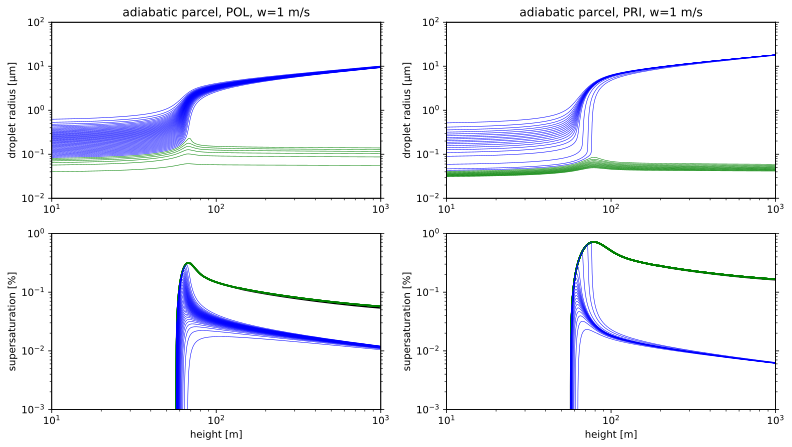

HTML(value="<a href='./fig2.pdf' target='_blank'>./fig2.pdf</a><br>")

In [4]:
def plot_R(ax,output_vol,output_crit_vol,output_z,k):
    for drop_id, volume in enumerate(output_vol):
        if drop_id%k==0:
            if TRIVIA.radius(volume=volume)[10]>0.03*si.um:
                crit_volume=output_crit_vol[drop_id]
                if np.all(volume<crit_volume):
                    ax.plot(
                        output_z,
                        TRIVIA.radius(volume=volume) / si.um,
                        linewidth=0.5,
                        color='green'
                    )
                elif volume[-1]<crit_volume[-1]:
                    ax.plot(
                        output_z,
                        TRIVIA.radius(volume=volume)/ si.um,
                        linewidth=0.5,
                        color='red'
                    )       
                else:
                    ax.plot(
                        output_z,
                        TRIVIA.radius(volume=volume) / si.um,
                        linewidth=0.5,
                        color='blue'
                    )


def plot_S(ax,output_Seq,output_vol,output_crit_vol,output_z,k):
    for drop_id, S_eq in enumerate(output_Seq):
        if drop_id%k==0:
            volume=output_vol[drop_id]
            crit_volume=output_crit_vol[drop_id]
            if TRIVIA.radius(volume=volume[10])>0.03*si.um:
                if np.all(volume<crit_volume):
                    ax.plot(
                        output_z,
                        (S_eq-1)*100,        
                        color='green')
                elif volume[-1]<crit_volume[-1]:
                    ax.plot(
                        output_z,
                        (S_eq-1)*100,
                        linewidth=0.5,
                        color='red')   
                else:
                    ax.plot(
                        output_z,
                        (S_eq-1)*100,
                        linewidth=0.5,
                        color='blue')              
                    

fig, axs = pyplot.subplots(2, 2, figsize=(13, 7))
axS1, axS2, axR1, axR2 = [axs[1,0], axs[1,1], axs[0,0], axs[0,1]]

for aerosol, i in (("polluted",0),("pristine",1)):
    axs[1,i].plot(output[aerosol]['products']['z'],np.asarray(output[aerosol]['products']['S_max'])-100, color='black')
    plot_S(axs[1,i],np.asarray(output[aerosol]['attributes']['equilibrium supersaturation']),np.asarray(output[aerosol]['attributes']['volume']),np.asarray(output[aerosol]['attributes']['critical volume']),np.asarray(output[aerosol]['products']['z']),4)
    plot_R(axs[0,i],np.asarray(output[aerosol]['attributes']['volume']),np.asarray(output[aerosol]['attributes']['critical volume']),np.asarray(output[aerosol]['products']['z']),4)

axS1_ = axS1.twinx() 
axS2_ = axS2.twinx() 
axR1_ = axR1.twinx() 
axR2_ = axR2.twinx()
for ax in [axS1, axS1_, axS2, axS2_, axR1, axR1_, axR2, axR2_]:
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlim(10, 1000)
for ax in [axS1,axS1_,axS2,axS2_]:
    ax.set_ylim(0.001, 1)
for ax in [axR1,axR1_,axR2,axR2_]:
    ax.set_ylim(0.01, 100)
for ax in [axR1,axR2]:
    ax.set_ylabel('droplet radius [μm]')
axR1.set_title('adiabatic parcel, POL, w=1 m/s')
axR2.set_title('adiabatic parcel, PRI, w=1 m/s')
for ax in [axS1,axS2]:
    ax.set_xlabel('height [m]')
    ax.set_ylabel('supersaturation [%]') 
for ax in [axS1_,axS2_,axR1_,axR2_]:
    ax.yaxis.set_major_formatter(ticker.NullFormatter())
show_plot("fig2.pdf")